In [41]:
import config
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import utils

In [3]:
imagePath = os.path.join(config.cwd, "data", "images", "cl8k2u1pm1dw7083203g1b7yv.jpg")
rawImage = cv2.imread(imagePath)

In [42]:
impaintedImage = utils.preprocess_image(rawImage)

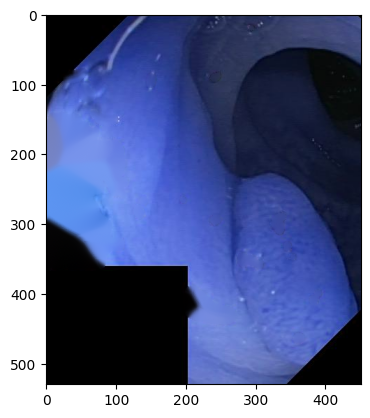

In [43]:
plt.imshow(impaintedImage)

First, it is necessary to convert the image from the original
RGB channel to grey scale to process the subsequent procedure

In [4]:
grayScale = cv2.cvtColor(rawImage, cv2.COLOR_BGR2GRAY)

the proposed approach employs standard thresholding method with a fixed threshold
value to identify specular highlights in all images

In [5]:
threshold = 180
_, thresholded = cv2.threshold(grayScale, threshold, 255, cv2.THRESH_BINARY)

 More specifically, a dilation operation with kernel size 3 × 3
is performed initially to connect the pixels related to undesirable parts.

In [6]:
dilated = cv2.dilate(thresholded, kernel=np.ones((3, 3), np.uint8), iterations=1)

Among the obtained
contours, those whose scaled area following the Modified Z-scores formula [30], as shown in
Formula 1, exceeds 17.0 

In [7]:
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

mask = np.zeros_like(dilated)
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 17: #This may be wrongly calculated
        cv2.drawContours(mask, [contour], -1, 255, -1)

The mask is then passed into another
erosion module with the same settings to restore the initial highlights intensity

In [8]:
eroded = cv2.erode(mask, kernel=np.ones((3, 3), np.uint8), iterations=1)

 Finally, Gaussian
filter of size 19 × 19 is applied to reduce the intensity of highlights area and improve the
inpainting performance.


In [32]:
smoothed = cv2.GaussianBlur(eroded, (19, 19), 0)
_, binary_mask = cv2.threshold(smoothed, 20, 1, cv2.THRESH_BINARY)

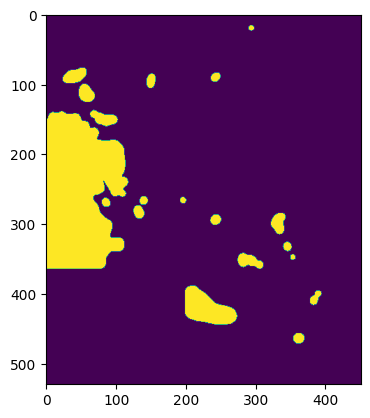

In [33]:
plt.imshow(binary_mask)

First, a filter of size 3×3 slides across every pixels of the original image and calculate the average
value

In [34]:
blurred_image = cv2.blur(rawImage, (3, 3))

In [35]:
replacedPixels = cv2.bitwise_and(blurred_image,blurred_image,mask = smoothed)
blacked = np.zeros_like(rawImage)

In [36]:
result = np.where(binary_mask[:, :, np.newaxis] == 1, replacedPixels, rawImage)

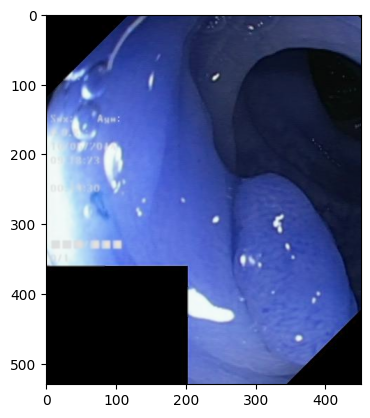

In [37]:
plt.imshow(result)

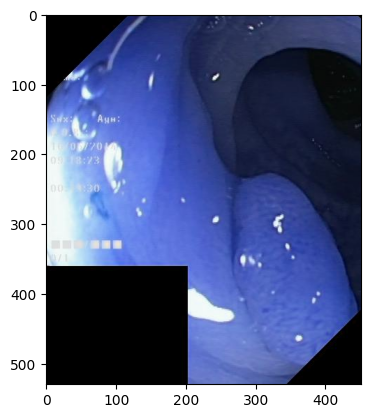

In [17]:
plt.imshow(rawImage)

In [38]:
inpainted = cv2.inpaint(result, binary_mask, 10, cv2.INPAINT_TELEA)

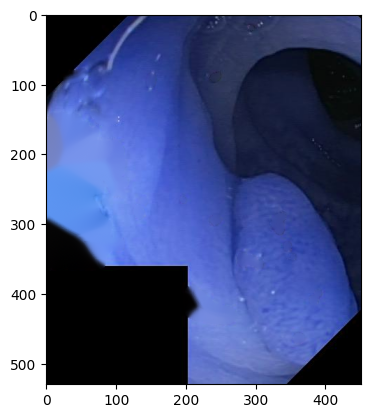

In [39]:
plt.imshow(inpainted)